## Import Requirement Library

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from shutil import copyfile
import matplotlib.pyplot as plt

## Extract dataset

In [2]:
zip_path = '.\data.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('data')
zip_ref.close()


In [3]:
import os

base_dir = 'data\data'
pet_dir = os.path.join(base_dir,'pet')
hdpe_botol_dir = os.path.join(base_dir,'hdpe_botol')
hdpe_tutup_botol_dir = os.path.join(base_dir,'hdpe_tutup_botol')
hdpe_container_dir = os.path.join(base_dir,'hdpe_container')
ldpe_bag_dir = os.path.join(base_dir,'ldpe_bag')
ldpe_botol_dir = os.path.join(base_dir,'ldpe_botol')
ps_dir = os.path.join(base_dir,'ps')
pp_botol_dir = os.path.join(base_dir,'pp_botol')
pp_container_dir = os.path.join(base_dir,'pp_container')
pp_sedotan_dir = os.path.join(base_dir,'pp_sedotan')
pp_tutup_botol_dir = os.path.join(base_dir,'pp_tutup_botol')
pvc_clear_dir = os.path.join(base_dir,'pvc_clear')
pvc_unclear_dir = os.path.join(base_dir,'pvc_unclear')
# other_dir = os.path.join(base_dir,'other')

print('Total file in pet dir {}'.format(len(os.listdir(pet_dir))))
print('Total file in hdpe botol dir {}'.format(len(os.listdir(hdpe_botol_dir))))
print('Total file in hdpe container dir {}'.format(len(os.listdir(hdpe_container_dir))))
print('Total file in hdpe tutup botol dir {}'.format(len(os.listdir(hdpe_tutup_botol_dir))))
print('Total file in ldpe bag dir {}'.format(len(os.listdir(ldpe_bag_dir))))
print('Total file in ldpe botol dir {}'.format(len(os.listdir(ldpe_botol_dir))))
print('Total file in ps dir {}'.format(len(os.listdir(ps_dir))))
print('Total file in pp botol dir {}'.format(len(os.listdir(pp_botol_dir))))
print('Total file in pp container dir {}'.format(len(os.listdir(pp_container_dir))))
print('Total file in pp sedotan dir {}'.format(len(os.listdir(pp_sedotan_dir))))
print('Total file in pp tutup botol dir {}'.format(len(os.listdir(pp_tutup_botol_dir))))
print('Total file in pvc clear dir {}'.format(len(os.listdir(pvc_clear_dir))))
print('Total file in pvc unclear dir {}'.format(len(os.listdir(pvc_unclear_dir))))
# print('Total file in other dir {}'.format(len(os.listdir(other_dir))))

pet_files= os.listdir(pet_dir)
print(pet_files[:10])

hdpe_botol_files= os.listdir(hdpe_botol_dir)
print(hdpe_botol_files[:10])

hdpe_tutup_botol_files= os.listdir(hdpe_tutup_botol_dir)
print(hdpe_tutup_botol_files[:10])

hdpe_container_files= os.listdir(hdpe_container_dir)
print(hdpe_container_files[:10])

ldpe_bag_files= os.listdir(ldpe_bag_dir)
print(ldpe_bag_files[:10])

ldpe_botol_files= os.listdir(ldpe_botol_dir)
print(ldpe_botol_files[:10])

ps_files= os.listdir(ps_dir)
print(ps_files[:10])

pp_botol_files= os.listdir(pp_botol_dir)
print(pp_botol_files[:10])

pp_container_files= os.listdir(pp_container_dir)
print(pp_container_files[:10])

pp_sedotan_files= os.listdir(pp_sedotan_dir)
print(pp_sedotan_files[:10])

pp_tutup_botol_files= os.listdir(pp_tutup_botol_dir)
print(pp_tutup_botol_files[:10])

pvc_clear_files= os.listdir(pvc_clear_dir)
print(pvc_clear_files[:10])

pvc_unclear_files= os.listdir(pvc_unclear_dir)
print(pvc_unclear_files[:10])

# other_files= os.listdir(other_dir)
# print(other_files[:10])


Total file in pet dir 270
Total file in hdpe botol dir 177
Total file in hdpe container dir 129
Total file in hdpe tutup botol dir 83
Total file in ldpe bag dir 161
Total file in ldpe botol dir 159
Total file in ps dir 247
Total file in pp botol dir 160
Total file in pp container dir 149
Total file in pp sedotan dir 30
Total file in pp tutup botol dir 100
Total file in pvc clear dir 156
Total file in pvc unclear dir 88
['0_35L-Spirit-Bottle-000843-scaled_1_11zon.png', '108-1086068_open-crushed-water-bottle-crushed-water-bottle-png_2_11zon.png', '360_F_498362712_7sJRmv7sOsfCtqieE0wtIjUpdUBvF4PY_3_11zon.png', '46726744-crushed-plastic-bottle-isolated-on-white_5_11zon.png', '93850_b88c6b47-8459-46b7-82bc-f28c774af031_4_11zon.png', 'crushed-plastic-bottle-10801423_7_11zon.png', 'crushed-plastic-bottle-isolated-on-white-2GK474W_8_11zon.png', 'crushedemptyplasticbottlebluewithcapmb3dmodel001_6_11zon.png', 'empty-pet-bottle-500x500_9_11zon.png', 'front-view-empty-pet-plastic-green-bottle-isol

## Visualize some dataset

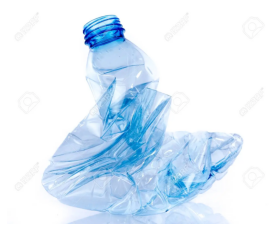

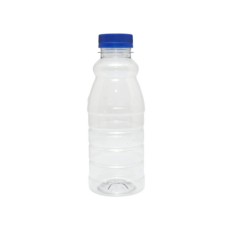

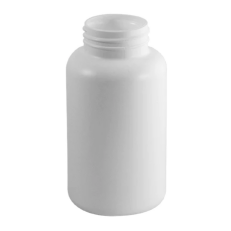

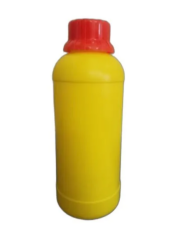

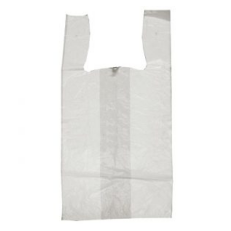

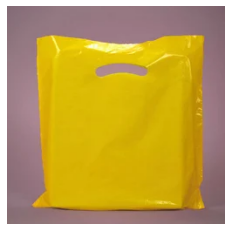

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_pet = [os.path.join(pet_dir, fname) for fname in pet_files[pic_index-2:pic_index]]
next_hdpe_botol = [os.path.join(hdpe_botol_dir, fname)for fname in hdpe_botol_files[pic_index-2:pic_index]]
next_ldpe_bag = [os.path.join(ldpe_bag_dir, fname) for fname in ldpe_bag_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_pet+next_hdpe_botol+next_ldpe_bag):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()



## Create Train and Val Directory

In [5]:
root_dir = './data/tmp_dataset'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path,'validation'))
    os.makedirs(os.path.join(root_path,'validation','pet'))
    os.makedirs(os.path.join(root_path,'validation','ldpe_botol'))    
    os.makedirs(os.path.join(root_path,'validation','ldpe_bag'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe_botol'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe_container'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe_tutup_botol'))    
    os.makedirs(os.path.join(root_path,'validation','ps'))    
    os.makedirs(os.path.join(root_path,'validation','pp_botol'))
    os.makedirs(os.path.join(root_path,'validation','pp_container'))
    os.makedirs(os.path.join(root_path,'validation','pp_sedotan'))
    os.makedirs(os.path.join(root_path,'validation','pp_tutup_botol'))
    os.makedirs(os.path.join(root_path,'validation','pvc_clear'))        
    os.makedirs(os.path.join(root_path,'validation','pvc_unclear'))        
    os.makedirs(os.path.join(root_path,'validation','other')) 
    
    os.makedirs(os.path.join(root_path,'training'))
    os.makedirs(os.path.join(root_path,'training','pet'))
    os.makedirs(os.path.join(root_path,'training','ldpe_botol'))    
    os.makedirs(os.path.join(root_path,'training','ldpe_bag'))    
    os.makedirs(os.path.join(root_path,'training','hdpe_botol'))    
    os.makedirs(os.path.join(root_path,'training','hdpe_container'))    
    os.makedirs(os.path.join(root_path,'training','hdpe_tutup_botol'))    
    os.makedirs(os.path.join(root_path,'training','ps'))    
    os.makedirs(os.path.join(root_path,'training','pp_botol'))
    os.makedirs(os.path.join(root_path,'training','pp_container'))
    os.makedirs(os.path.join(root_path,'training','pp_sedotan'))
    os.makedirs(os.path.join(root_path,'training','pp_tutup_botol'))
    os.makedirs(os.path.join(root_path,'training','pvc_clear'))        
    os.makedirs(os.path.join(root_path,'training','pvc_unclear'))        
    os.makedirs(os.path.join(root_path,'training','other'))  

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./data/tmp_dataset\training
./data/tmp_dataset\validation
./data/tmp_dataset\training\hdpe_botol
./data/tmp_dataset\training\hdpe_container
./data/tmp_dataset\training\hdpe_tutup_botol
./data/tmp_dataset\training\ldpe_bag
./data/tmp_dataset\training\ldpe_botol
./data/tmp_dataset\training\other
./data/tmp_dataset\training\pet
./data/tmp_dataset\training\pp_botol
./data/tmp_dataset\training\pp_container
./data/tmp_dataset\training\pp_sedotan
./data/tmp_dataset\training\pp_tutup_botol
./data/tmp_dataset\training\ps
./data/tmp_dataset\training\pvc_clear
./data/tmp_dataset\training\pvc_unclear
./data/tmp_dataset\validation\hdpe_botol
./data/tmp_dataset\validation\hdpe_container
./data/tmp_dataset\validation\hdpe_tutup_botol
./data/tmp_dataset\validation\ldpe_bag
./data/tmp_dataset\validation\ldpe_botol
./data/tmp_dataset\validation\other
./data/tmp_dataset\validation\pet
./data/tmp_dataset\validation\pp_botol
./data/tmp_dataset\validation\pp_container
./data/tmp_dataset\validation\pp_sedota

In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    len_source_dir = len(os.listdir(SOURCE_DIR))
    len_split_file = round(len_source_dir * SPLIT_SIZE)
    shuffle_file = random.sample(os.listdir(SOURCE_DIR), len_source_dir)
    
    for fname in shuffle_file[:len_split_file]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(TRAINING_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    for fname in shuffle_file[len_split_file:]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(VALIDATION_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    ## END CODE HERE
    return shuffle_file

In [8]:
PET_SOURCE_DIR = "./data/data/pet"
LDPE_BOTOL_SOURCE_DIR = "./data/data/ldpe_botol"
LDPE_BAG_SOURCE_DIR = "./data/data/ldpe_bag"
HDPE_BOTOL_SOURCE_DIR = "./data/data/hdpe_botol"
HDPE_TUTUP_BOTOL_SOURCE_DIR = "./data/data/hdpe_tutup_botol"
HDPE_CONTAINER_SOURCE_DIR = "./data/data/hdpe_container"
PS_SOURCE_DIR = "./data/data/ps"
PP_BOTOL_SOURCE_DIR = "./data/data/pp_botol"
PP_CONTAINER_SOURCE_DIR = "./data/data/pp_container"
PP_SEDOTAN_SOURCE_DIR = "./data/data/pp_sedotan"
PP_TUTUP_BOTOL_SOURCE_DIR = "./data/data/pp_tutup_botol"
PVC_CLEAR_SOURCE_DIR = "./data/data/pvc_clear"
PVC_UNCLEAR_SOURCE_DIR = "./data/data/pvc_unclear"
# OTHER_SOURCE_DIR = "./data/data/other"

TRAINING_DIR = "./data/tmp_dataset/training"
VALIDATION_DIR = "./data/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_botol/")
VALIDATION_HDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_botol/")

TRAINING_HDPE_CONTAINER_DIR = os.path.join(TRAINING_DIR,"hdpe_container/")
VALIDATION_HDPE_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"hdpe_container/")

TRAINING_HDPE_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_tutup_botol/")
VALIDATION_HDPE_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_tutup_botol/")

TRAINING_LDPE_BAG_DIR = os.path.join(TRAINING_DIR,"ldpe_bag/")
VALIDATION_LDPE_BAG_DIR = os.path.join(VALIDATION_DIR,"ldpe_bag/")

TRAINING_LDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"ldpe_botol/")
VALIDATION_LDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"ldpe_botol/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_botol/")
VALIDATION_PP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_botol/")

TRAINING_PP_CONTAINER_DIR = os.path.join(TRAINING_DIR,"pp_container/")
VALIDATION_PP_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"pp_container/")

TRAINING_PP_SEDOTAN_DIR = os.path.join(TRAINING_DIR,"pp_sedotan/")
VALIDATION_PP_SEDOTAN_DIR = os.path.join(VALIDATION_DIR,"pp_sedotan/")

TRAINING_PP_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_tutup_botol/")
VALIDATION_PP_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_tutup_botol/")

TRAINING_PVC_CLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_clear/")
VALIDATION_PVC_CLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_clear/")

TRAINING_PVC_UNCLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_unclear/")
VALIDATION_PVC_UNCLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_unclear/")


# TRAINING_OTHER_DIR = os.path.join(TRAINING_DIR,"other/")
# VALIDATION_OTHER_DIR = os.path.join(VALIDATION_DIR,"other/")

split_size = .9

pet = split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
ldpe_botol = split_data(LDPE_BOTOL_SOURCE_DIR, TRAINING_LDPE_BOTOL_DIR, VALIDATION_LDPE_BOTOL_DIR, split_size)
ldpe_bag = split_data(LDPE_BAG_SOURCE_DIR, TRAINING_LDPE_BAG_DIR, VALIDATION_LDPE_BAG_DIR, split_size)
hdpe_botol = split_data(HDPE_BOTOL_SOURCE_DIR, TRAINING_HDPE_BOTOL_DIR, VALIDATION_HDPE_BOTOL_DIR, split_size)
hdpe_tutup_botol = split_data(HDPE_TUTUP_BOTOL_SOURCE_DIR, TRAINING_HDPE_TUTUP_BOTOL_DIR, VALIDATION_HDPE_TUTUP_BOTOL_DIR, split_size)
hdpe_container = split_data(HDPE_CONTAINER_SOURCE_DIR, TRAINING_HDPE_CONTAINER_DIR, VALIDATION_HDPE_CONTAINER_DIR, split_size)
ps = split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
pp_botol = split_data(PP_BOTOL_SOURCE_DIR, TRAINING_PP_BOTOL_DIR, VALIDATION_PP_BOTOL_DIR, split_size)
pp_container = split_data(PP_CONTAINER_SOURCE_DIR, TRAINING_PP_CONTAINER_DIR, VALIDATION_PP_CONTAINER_DIR, split_size)
pp_sedotan = split_data(PP_SEDOTAN_SOURCE_DIR, TRAINING_PP_SEDOTAN_DIR, VALIDATION_PP_SEDOTAN_DIR, split_size)
pp_tutup_botol = split_data(PP_TUTUP_BOTOL_SOURCE_DIR, TRAINING_PP_TUTUP_BOTOL_DIR, VALIDATION_PP_TUTUP_BOTOL_DIR, split_size)
pvc_clear = split_data(PVC_CLEAR_SOURCE_DIR, TRAINING_PVC_CLEAR_DIR, VALIDATION_PVC_CLEAR_DIR, split_size)
pvc_unclear = split_data(PVC_UNCLEAR_SOURCE_DIR, TRAINING_PVC_UNCLEAR_DIR, VALIDATION_PVC_UNCLEAR_DIR, split_size)
# other = split_data(OTHER_SOURCE_DIR, TRAINING_OTHER_DIR, VALIDATION_OTHER_DIR, split_size)

print(pet)

['pet_119.png', 'pet_147.png', 'pet_140.png', 'pet_71.png', 'pet_218.png', 'pet_130.png', 'pet_225.png', 'pet_3.png', 'pet_195.png', 'pet_68.png', 'pet_20.png', 'pet_198.png', 'pet_16.png', 'pet_219.png', 'pet_144.png', 'pet_24.png', 'pet_114.png', 'pet_224.png', 'pet_191.png', 'pet_179.png', 'pet_103.png', 'pet_60.png', 'pet_46.png', 'pet_168.png', 'pet_21.png', 'pet_25.png', 'pet_72.png', 'pet_127.png', '0_35L-Spirit-Bottle-000843-scaled_1_11zon.png', 'pet_199.png', 'pet_70.png', 'pet_190.png', 'pet_1.png', 'pet_104.png', 'pet_100.png', 'pet_125.png', 'pet_64.png', 'crushed-plastic-bottle-10801423_7_11zon.png', 'pet_40.png', 'pet_155.png', 'pet_12.png', 'pet_156.png', 'pet_79.png', 'pet_132.png', 'pet_161.png', 'pet_200.png', 'pet_33.png', 'x-bottle-sq500_20_11zon.png', 'pet_180.png', 'pet_45.png', 'pet_171.png', 'pet_241.png', 'pet_67.png', 'pet_126.png', 'pet_65.png', 'pet_63.png', 'istockphoto-1295052141-612x612_15_11zon.png', 'pet_142.png', 'pet_244.png', 'pet_239.png', 'small_Cl

In [9]:
# Test your split_data function
PET_SOURCE_DIR = "./data/data/pet"
LDPE_BOTOL_SOURCE_DIR = "./data/data/ldpe_botol"
LDPE_BAG_SOURCE_DIR = "./data/data/ldpe_bag"
HDPE_BOTOL_SOURCE_DIR = "./data/data/hdpe_botol"
HDPE_TUTUP_BOTOL_SOURCE_DIR = "./data/data/hdpe_tutup_botol"
HDPE_CONTAINER_SOURCE_DIR = "./data/data/hdpe_container"
PS_SOURCE_DIR = "./data/data/ps"
PP_BOTOL_SOURCE_DIR = "./data/data/pp_botol"
PP_CONTAINER_SOURCE_DIR = "./data/data/pp_container"
PP_SEDOTAN_SOURCE_DIR = "./data/data/pp_sedotan"
PP_TUTUP_BOTOL_SOURCE_DIR = "./data/data/pp_tutup_botol"
PVC_CLEAR_SOURCE_DIR = "./data/data/pvc_clear"
PVC_UNCLEAR_SOURCE_DIR = "./data/data/pvc_unclear"
# OTHER_SOURCE_DIR = "./data/data/other"

TRAINING_DIR = "./data/tmp_dataset/training"
VALIDATION_DIR = "./data/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_botol/")
VALIDATION_HDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_botol/")

TRAINING_HDPE_CONTAINER_DIR = os.path.join(TRAINING_DIR,"hdpe_container/")
VALIDATION_HDPE_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"hdpe_container/")

TRAINING_HDPE_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"hdpe_tutup_botol/")
VALIDATION_HDPE_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"hdpe_tutup_botol/")

TRAINING_LDPE_BAG_DIR = os.path.join(TRAINING_DIR,"ldpe_bag/")
VALIDATION_LDPE_BAG_DIR = os.path.join(VALIDATION_DIR,"ldpe_bag/")

TRAINING_LDPE_BOTOL_DIR = os.path.join(TRAINING_DIR,"ldpe_botol/")
VALIDATION_LDPE_BOTOL_DIR = os.path.join(VALIDATION_DIR,"ldpe_botol/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_botol/")
VALIDATION_PP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_botol/")

TRAINING_PP_CONTAINER_DIR = os.path.join(TRAINING_DIR,"pp_container/")
VALIDATION_PP_CONTAINER_DIR = os.path.join(VALIDATION_DIR,"pp_container/")

TRAINING_PP_SEDOTAN_DIR = os.path.join(TRAINING_DIR,"pp_sedotan/")
VALIDATION_PP_SEDOTAN_DIR = os.path.join(VALIDATION_DIR,"pp_sedotan/")

TRAINING_PP_TUTUP_BOTOL_DIR = os.path.join(TRAINING_DIR,"pp_tutup_botol/")
VALIDATION_PP_TUTUP_BOTOL_DIR = os.path.join(VALIDATION_DIR,"pp_tutup_botol/")

TRAINING_PVC_CLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_clear/")
VALIDATION_PVC_CLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_clear/")

TRAINING_PVC_UNCLEAR_DIR = os.path.join(TRAINING_DIR,"pvc_unclear/")
VALIDATION_PVC_UNCLEAR_DIR = os.path.join(VALIDATION_DIR,"pvc_unclear/")

# print(TRAINING_OTHER_DIR)
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_PET_DIR)) > 0:
    for file in os.scandir(TRAINING_PET_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_CONTAINER_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_LDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_LDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_LDPE_BAG_DIR)) > 0:
    for file in os.scandir(TRAINING_LDPE_BAG_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PS_DIR)) > 0:
    for file in os.scandir(TRAINING_PS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_CONTAINER_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_SEDOTAN_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_SEDOTAN_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PVC_CLEAR_DIR)) > 0:
    for file in os.scandir(TRAINING_PVC_CLEAR_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PVC_UNCLEAR_DIR)) > 0:
    for file in os.scandir(TRAINING_PVC_UNCLEAR_DIR):
        os.remove(file.path)
# if len(os.listdir(TRAINING_OTHER_DIR)) > 0:
#     for file in os.scandir(TRAINING_OTHER_DIR):
#         os.remove(file.path)
        
if len(os.listdir(VALIDATION_PET_DIR)) > 0:
    for file in os.scandir(VALIDATION_PET_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_CONTAINER_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_LDPE_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_LDPE_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_LDPE_BAG_DIR)) > 0:
    for file in os.scandir(VALIDATION_LDPE_BAG_DIR):
        os.remove(file.path)        
if len(os.listdir(VALIDATION_PS_DIR)) > 0:
    for file in os.scandir(VALIDATION_PS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_TUTUP_BOTOL_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_TUTUP_BOTOL_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_CONTAINER_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_CONTAINER_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_SEDOTAN_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_SEDOTAN_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PVC_CLEAR_DIR)) > 0:
    for file in os.scandir(VALIDATION_PVC_CLEAR_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PVC_UNCLEAR_DIR)) > 0:
    for file in os.scandir(VALIDATION_PVC_UNCLEAR_DIR):
        os.remove(file.path)
# if len(os.listdir(VALIDATION_OTHER_DIR)) > 0:
#     for file in os.scandir(VALIDATION_OTHER_DIR):
#         os.remove(file.path)

# Define proportion of images used for training
split_size = .7

split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
split_data(LDPE_BOTOL_SOURCE_DIR, TRAINING_LDPE_BOTOL_DIR, VALIDATION_LDPE_BOTOL_DIR, split_size)
split_data(LDPE_BAG_SOURCE_DIR, TRAINING_LDPE_BAG_DIR, VALIDATION_LDPE_BAG_DIR, split_size)
split_data(HDPE_BOTOL_SOURCE_DIR, TRAINING_HDPE_BOTOL_DIR, VALIDATION_HDPE_BOTOL_DIR, split_size)
split_data(HDPE_TUTUP_BOTOL_SOURCE_DIR, TRAINING_HDPE_TUTUP_BOTOL_DIR, VALIDATION_HDPE_TUTUP_BOTOL_DIR, split_size)
split_data(HDPE_CONTAINER_SOURCE_DIR, TRAINING_HDPE_CONTAINER_DIR, VALIDATION_HDPE_CONTAINER_DIR, split_size)
split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
split_data(PP_BOTOL_SOURCE_DIR, TRAINING_PP_BOTOL_DIR, VALIDATION_PP_BOTOL_DIR, split_size)
split_data(PP_CONTAINER_SOURCE_DIR, TRAINING_PP_CONTAINER_DIR, VALIDATION_PP_CONTAINER_DIR, split_size)
split_data(PP_SEDOTAN_SOURCE_DIR, TRAINING_PP_SEDOTAN_DIR, VALIDATION_PP_SEDOTAN_DIR, split_size)
split_data(PP_TUTUP_BOTOL_SOURCE_DIR, TRAINING_PP_TUTUP_BOTOL_DIR, VALIDATION_PP_TUTUP_BOTOL_DIR, split_size)
split_data(PVC_CLEAR_SOURCE_DIR, TRAINING_PVC_CLEAR_DIR, VALIDATION_PVC_CLEAR_DIR, split_size)
split_data(PVC_UNCLEAR_SOURCE_DIR, TRAINING_PVC_UNCLEAR_DIR, VALIDATION_PVC_UNCLEAR_DIR, split_size)

print(f"\n\nOriginal pet's directory has {len(os.listdir(PET_SOURCE_DIR))} images")
print(f"Original hdpe botol's directory has {len(os.listdir(HDPE_BOTOL_SOURCE_DIR))} images\n")
print(f"Original hdpe container's directory has {len(os.listdir(HDPE_CONTAINER_SOURCE_DIR))} images\n")
print(f"Original hdpe tutup botol 's directory has {len(os.listdir(HDPE_TUTUP_BOTOL_SOURCE_DIR))} images\n")
print(f"Original ldpe botol's directory has {len(os.listdir(LDPE_BOTOL_SOURCE_DIR))} images\n")
print(f"Original ldpe bag's directory has {len(os.listdir(LDPE_BAG_SOURCE_DIR))} images\n")
print(f"Original ps's directory has {len(os.listdir(PS_SOURCE_DIR))} images\n")
print(f"Original pp botol's directory has {len(os.listdir(PP_BOTOL_SOURCE_DIR))} images\n")
print(f"Original pp container's directory has {len(os.listdir(PP_CONTAINER_SOURCE_DIR))} images\n")
print(f"Original pp sedotan's directory has {len(os.listdir(PP_SEDOTAN_SOURCE_DIR))} images\n")
print(f"Original pp tutup botol's directory has {len(os.listdir(PP_TUTUP_BOTOL_SOURCE_DIR))} images\n")
print(f"Original pvc clear's directory has {len(os.listdir(PVC_CLEAR_SOURCE_DIR))} images\n")
print(f"Original pvc unclear's directory has {len(os.listdir(PVC_UNCLEAR_SOURCE_DIR))} images\n")
# print(f"Original other's directory has {len(os.listdir(OTHER_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_PET_DIR))} images of PET for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_BOTOL_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_TUTUP_BOTOL_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_CONTAINER_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_LDPE_BAG_DIR))} images of LDPE for training")
print(f"There are {len(os.listdir(TRAINING_LDPE_BOTOL_DIR))} images of LDPE for training")
print(f"There are {len(os.listdir(TRAINING_PS_DIR))} images of PS for training")
print(f"There are {len(os.listdir(TRAINING_PP_BOTOL_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PP_CONTAINER_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PP_SEDOTAN_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PP_TUTUP_BOTOL_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PVC_CLEAR_DIR))} images of PVC for training")
print(f"There are {len(os.listdir(TRAINING_PVC_UNCLEAR_DIR))} images of PVC for training")
# print(f"There are {len(os.listdir(TRAINING_OTHER_DIR))} images of OTHER for training")

print(f"There are {len(os.listdir(VALIDATION_PET_DIR))} images of PET for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_BOTOL_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_TUTUP_BOTOL_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_CONTAINER_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_LDPE_BAG_DIR))} images of LDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_LDPE_BOTOL_DIR))} images of LDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PS_DIR))} images of PS for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_BOTOL_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_TUTUP_BOTOL_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_CONTAINER_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_SEDOTAN_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PVC_CLEAR_DIR))} images of PVC for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PVC_UNCLEAR_DIR))} images of PVC for VALIDATION")
# print(f"There are {len(os.listdir(VALIDATION_OTHER_DIR))} images of OTHER for VALIDATION")




Original pet's directory has 270 images
Original hdpe botol's directory has 177 images

Original hdpe container's directory has 129 images

Original hdpe tutup botol 's directory has 83 images

Original ldpe botol's directory has 159 images

Original ldpe bag's directory has 161 images

Original ps's directory has 247 images

Original pp botol's directory has 160 images

Original pp container's directory has 149 images

Original pp sedotan's directory has 30 images

Original pp tutup botol's directory has 100 images

Original pvc clear's directory has 156 images

Original pvc unclear's directory has 88 images

There are 189 images of PET for training
There are 124 images of HDPE for training
There are 58 images of HDPE for training
There are 90 images of HDPE for training
There are 113 images of LDPE for training
There are 111 images of LDPE for training
There are 173 images of PS for training
There are 112 images of PP for training
There are 104 images of PP for training
There are 2

In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')  
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                              batch_size=45,
                                              class_mode='binary',
                                              target_size=(150, 150))
    validation_datagen = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')  
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=45,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
    return train_generator,validation_generator

In [11]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

print(TRAINING_DIR)
label_map = (train_generator.class_indices)
print(label_map)

Found 1336 images belonging to 14 classes.
Found 573 images belonging to 14 classes.
./data/tmp_dataset/training
{'hdpe_botol': 0, 'hdpe_container': 1, 'hdpe_tutup_botol': 2, 'ldpe_bag': 3, 'ldpe_botol': 4, 'other': 5, 'pet': 6, 'pp_botol': 7, 'pp_container': 8, 'pp_sedotan': 9, 'pp_tutup_botol': 10, 'ps': 11, 'pvc_clear': 12, 'pvc_unclear': 13}


In [12]:
x,y = next(train_generator)
x.shape # input shape of one record is (331,331,3) , 32: is the batch size

(45, 150, 150, 3)

In [13]:
import tensorflow as tf
IMG_SHAPE = (150, 150,3)
base_model = tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
# Print the model summary
base_model.summary()



219055592/219055592 [==============================] - 159s 1us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
           

In [14]:
base_model.trainable = False

In [15]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [16]:
prediction_layer = tf.keras.layers.Dense(14,activation='softmax')

In [17]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    prediction_layer
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 512)               786944    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [19]:
base_learning_rate = 0.0001
# model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [21]:
batch_size=45
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

In [22]:
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
len(model.trainable_variables)

8

In [23]:
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    callbacks=[early])

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 2.4917 - accuracy: 0.2091

G:\Anaconda\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 105s 3s/step - loss: 2.4917 - accuracy: 0.2091 - val_loss: 1.9059 - val_accuracy: 0.4333
Epoch 2/50
29/29 [==============================] - 88s 3s/step - loss: 1.9511 - accuracy: 0.3610 - val_loss: 1.5666 - val_accuracy: 0.5241
Epoch 3/50
29/29 [==============================] - 84s 3s/step - loss: 1.7084 - accuracy: 0.4493 - val_loss: 1.3801 - val_accuracy: 0.5611
Epoch 4/50
29/29 [==============================] - 79s 3s/step - loss: 1.5438 - accuracy: 0.4779 - val_loss: 1.2872 - val_accuracy: 0.5907
Epoch 5/50
29/29 [==============================] - 80s 3s/step - loss: 1.4281 - accuracy: 0.5376 - val_loss: 1.2285 - val_accuracy: 0.5944
Epoch 6/50
29/29 [==============================] - 79s 3s/step - loss: 1.3274 - accuracy: 0.5647 - val_loss: 1.2019 - val_accuracy: 0.6130
Epoch 7/50
29/29 [==============================] - 94s 3s/step - loss: 1.2217 - accuracy: 0.5949 - val_loss: 1.1225 - val_accuracy: 0.6259
Epoch 8/50
29/29 [============

In [24]:
accuracy_score = model.evaluate(train_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

30/30 [==============================] - 57s 2s/step - loss: 0.5266 - accuracy: 0.8249
[0.526599645614624, 0.82485032081604]
Accuracy: 82.4850%
Loss:  0.526599645614624


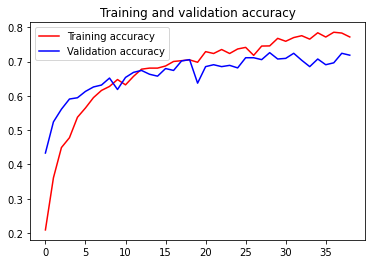

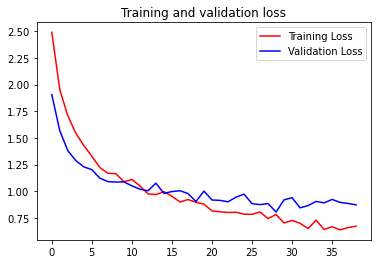

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
!pip install ipywidgets
!pip install Pillow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


FileUpload(value={}, description='Upload')

Button(description='Upload', style=ButtonStyle())

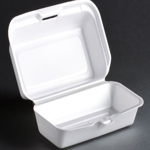

1/1 [==============================] - 0s 143ms/step
Filename: image.jpg
[[0.00000000e+00 8.89308494e-19 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.45666762e-28
  1.04003807e-22 0.00000000e+00]], category: 3, label: ldpe_bag


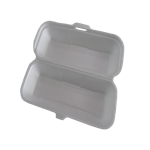

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/inception_resnet_v2/activation/Relu' defined at (most recent call last):
    File "G:\Anaconda\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "G:\Anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "G:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "G:\Anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "G:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "G:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "G:\Anaconda\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "G:\Anaconda\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "G:\Anaconda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "G:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "G:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "G:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 365, in dispatch_shell
      result = handler(self.shell_stream, idents, msg)
    File "G:\Anaconda\lib\site-packages\ipykernel\comm\manager.py", line 109, in comm_msg
      comm.handle_msg(msg)
    File "G:\Anaconda\lib\site-packages\ipykernel\comm\comm.py", line 161, in handle_msg
      self._msg_callback(msg)
    File "G:\Anaconda\lib\site-packages\ipywidgets\widgets\widget.py", line 217, in m
      return(method(self, *args, **kwargs))
    File "G:\Anaconda\lib\site-packages\ipywidgets\widgets\widget.py", line 685, in _handle_msg
      self._handle_custom_msg(data['content'], msg['buffers'])
    File "G:\Anaconda\lib\site-packages\ipywidgets\widgets\widget.py", line 693, in _handle_custom_msg
      self._msg_callbacks(self, content, buffers)
    File "G:\Anaconda\lib\site-packages\ipywidgets\widgets\widget.py", line 186, in __call__
      local_value = callback(*args, **kwargs)
    File "G:\Anaconda\lib\site-packages\ipywidgets\widgets\widget_button.py", line 105, in _handle_button_msg
      self.click()
    File "G:\Anaconda\lib\site-packages\ipywidgets\widgets\widget_button.py", line 94, in click
      self._click_handlers(self)
    File "G:\Anaconda\lib\site-packages\ipywidgets\widgets\widget.py", line 186, in __call__
      local_value = callback(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_38584\3006493658.py", line 24, in on_upload_button_clicked
      classes = model.predict(images)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\layers\core\activation.py", line 59, in call
      return self.activation(inputs)
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\TUF GAMING\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/inception_resnet_v2/activation/Relu'
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node sequential/inception_resnet_v2/activation/Relu}}]] [Op:__inference_predict_function_301022]

In [39]:
from IPython.display import display
import ipywidgets as widgets
import io
from PIL import Image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array, load_img

upload_widget = widgets.FileUpload()
display(upload_widget)

def on_upload_button_clicked(change):
    uploaded_image = upload_widget.value[list(upload_widget.value.keys())[0]]['content']
    pil_image = Image.open(io.BytesIO(uploaded_image))
    resized_image = pil_image.resize((150, 150))

    display(resized_image)

    x = img_to_array(resized_image)

    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)

    filename = list(upload_widget.value.keys())[0]
    print("Filename:", filename)
#     print("Classes:", classes)
    label_name = list(filter(lambda x: train_generator.class_indices[x] == np.argmax(classes), train_generator.class_indices))[0]
    print( f"{classes}, category: {np.argmax(classes)}, label: {label_name}")

upload_button = widgets.Button(description="Upload")
upload_button.on_click(on_upload_button_clicked)

# Display the button
display(upload_button)


In [28]:
label_map = (train_generator.class_indices)
print(label_map)

{'hdpe_botol': 0, 'hdpe_container': 1, 'hdpe_tutup_botol': 2, 'ldpe_bag': 3, 'ldpe_botol': 4, 'other': 5, 'pet': 6, 'pp_botol': 7, 'pp_container': 8, 'pp_sedotan': 9, 'pp_tutup_botol': 10, 'ps': 11, 'pvc_clear': 12, 'pvc_unclear': 13}


# EXPORT TFLITE

In [29]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)


INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [30]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [31]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations =[optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [32]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

56566688